
# Supernovae distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.\
Let's recall the definition of magnitude and the distance modulus:\
(Insert formula)\
Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored.\
These are some (synthetic but realistic; see textbook) supernova data:

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lilit\AppData\Local\Temp\ipykernel_2988\1478536921.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$')


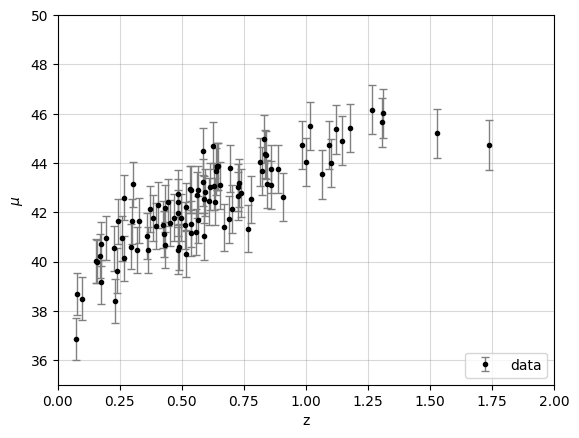

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from astroML.datasets import generate_mu_z

N = 100     # Number of samples to generate
z_sample, mu_sample, dmu = generate_mu_z(N, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', capsize=3, lw=1,label='data')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.legend(loc='lower right')
plt.grid(alpha=0.3, c='gray')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()


### Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

### Linear regression

[39.56505555] [[4.64711848]]


<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lilit\AppData\Local\Temp\ipykernel_2988\3095043505.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$')


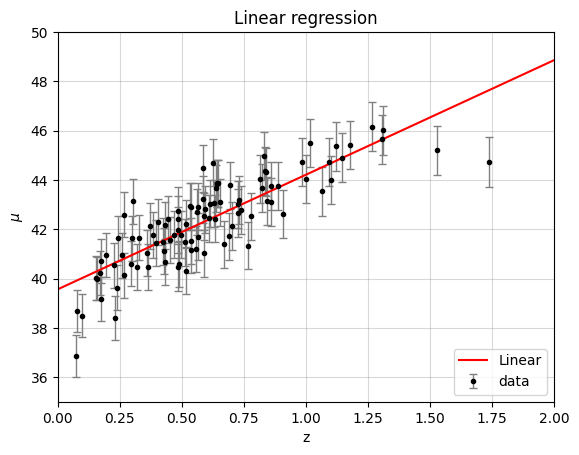

In [42]:
# Linear regression
from sklearn.linear_model import LinearRegression

#print(z_sample.shape)

#z = z_sample.reshape(N, 1)
#mu = mu_sample.reshape(N, 1)

#print(z_sample.shape, mu_sample.shape)     # (N, ) and (N, )

lin_reg = LinearRegression()
#lin_reg.fit(z, mu, sample_weight=1)
lin_reg.fit(z_sample[:, np.newaxis], mu_sample[:, np.newaxis], sample_weight=1)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)

X_points = np.linspace(0, 2.0, 10)
Y_pred = theta0 + theta1 * X_points

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', capsize=3, lw=1,label='data')
plt.plot(X_points, Y_pred[0], c = 'red', label = 'Linear')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.legend(loc='lower right')
plt.grid(alpha=0.3, c='gray')
plt.title('Linear regression')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

### Polynomial regression

<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lilit\AppData\Local\Temp\ipykernel_2988\2378885081.py:39: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$')


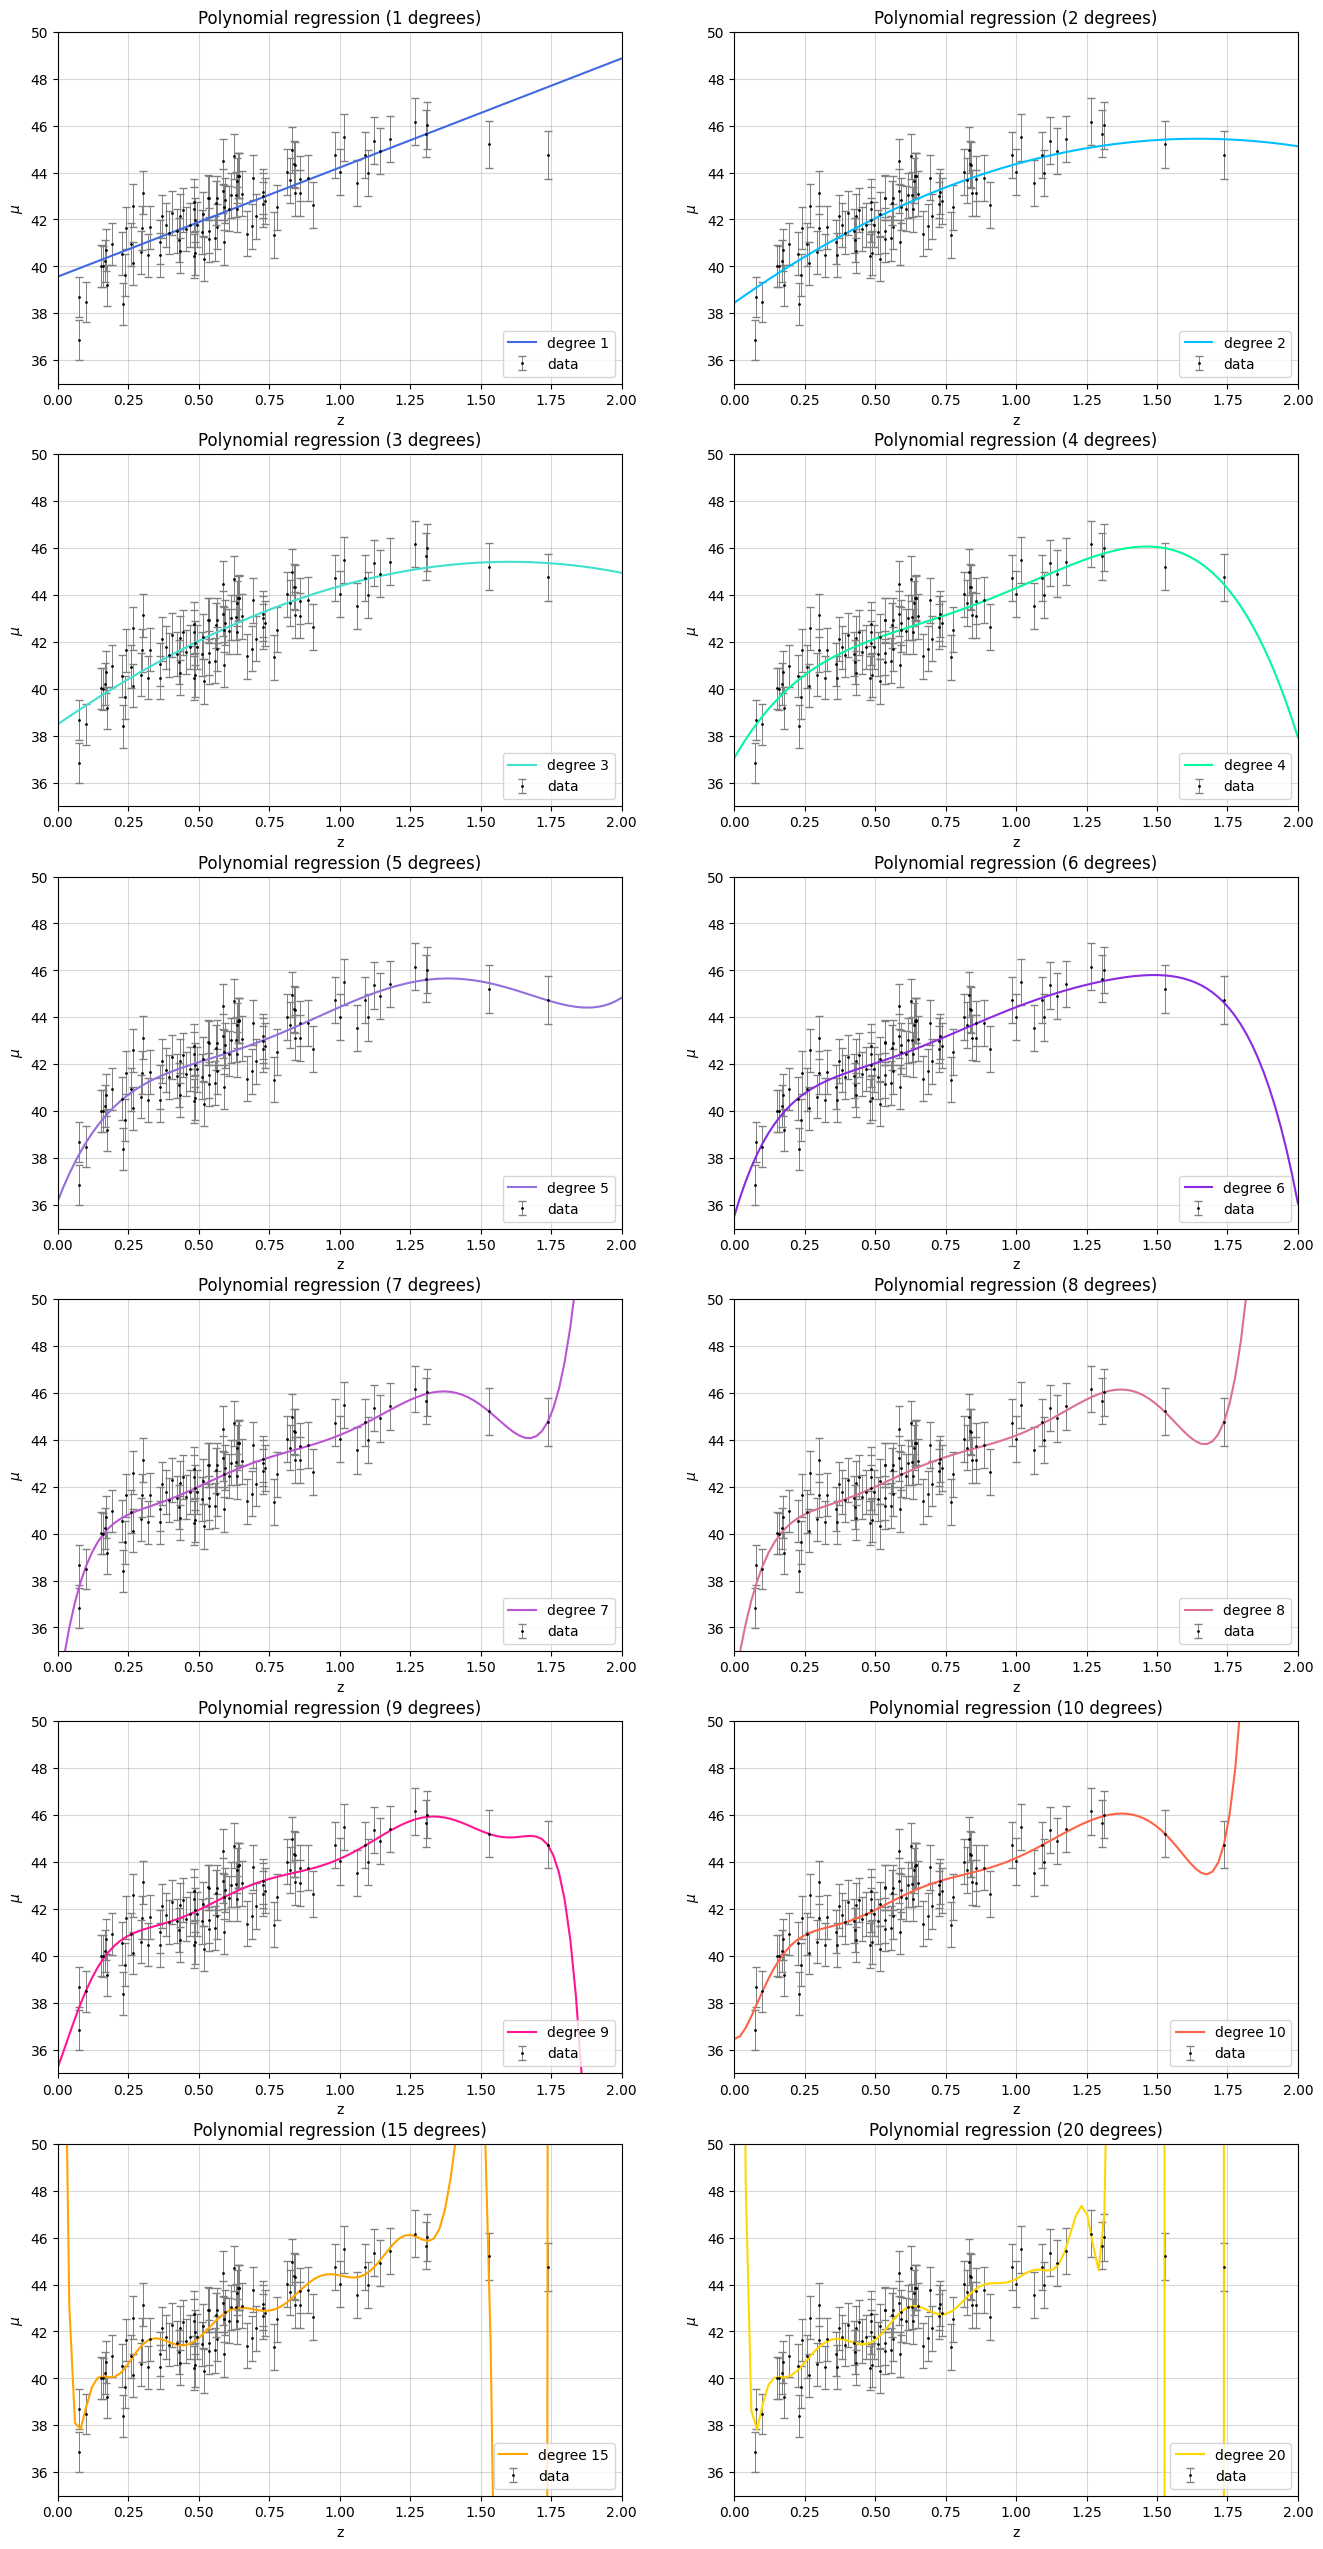

In [52]:
# Polynomial regression
from astroML.linear_model import PolynomialRegression

# Plotting the points
#plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ms = 2, ecolor='gray', elinewidth = 0.7, capsize=3, lw=1, label='data')

# Array to plot the polynomials
X_points = np.linspace(0, 2.0, 100)
#print(X_points.shape)
X_points = X_points.reshape(100, 1)

# With astroML, z_sample needs to be (N, 1) and mu_sample (N, )
#print(z_sample.shape)
#print(mu_sample.shape)
z_sample = z_sample.reshape(N, 1)
#print(z_sample.shape)


fig = plt.figure(figsize=(16, 32))

colors = ['royalblue', 'deepskyblue', 'turquoise', 'mediumspringgreen', 'mediumpurple', 'blueviolet', 'mediumorchid', 'palevioletred', 'deeppink', 'tomato', 'orange', 'gold']
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for i, degree in enumerate(degrees):
    ax = fig.add_subplot(6,2,1+i)
    plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ms = 2, ecolor='gray', elinewidth = 0.7, capsize=3, lw=1, label='data')
    
    model = PolynomialRegression(degree)
    model.fit(z_sample, mu_sample)
    Y_poly = model.predict(X_points)
    #print(Y_poly.shape)
    
    plt.plot(X_points, Y_poly, lw = 1.5, color = colors[i], label="degree %d" % degree)
    plt.xlabel('z')
    plt.ylabel('$\mu$')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3, c='gray')
    plt.title('Polynomial regression (' + str(degree) + ' degrees)')
    plt.xlim(0,2)
    plt.ylim(35,50)
    
plt.show()

Judging by these plots, the linear fit seems to be underfitting the data, while over 7 degrees the polynomials clearly overfit the data. Out of all of them, the $2$- and $3$-degrees polynomials seem to be the best fits for the data.

### Training and validation sets

In [58]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define our functional form
def func(x, dy=0.1):
    return np.random.normal(np.sin(x) * x, dy)

#------------------------------------------------------------
# select the (noisy) data
np.random.seed(0)
x = np.linspace(0, 3, 22)[1:-1]
dy = 0.1
y = func(x, dy)

#------------------------------------------------------------
# Select the cross-validation points
np.random.seed(1)
x_cv = 3 * np.random.random(20)
y_cv = func(x_cv)

x_fit = np.linspace(0, 3, 1000)

#------------------------------------------------------------
# Third figure: plot errors as a function of polynomial degree d
d = np.arange(0, 21)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))
for i in range(len(d)):
    p = np.polyfit(x, y, d[i])
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

BIC_train = np.sqrt(len(y)) * training_err / dy + d * np.log(len(y))
BIC_crossval = np.sqrt(len(y)) * crossval_err / dy + d * np.log(len(y))

ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')
ax.plot(d, 0.1 * np.ones(d.shape), ':k')

ax.set_xlim(0, 14)
ax.set_ylim(0, 0.8)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(d, BIC_crossval, '--k', label='cross-validation')
ax.plot(d, BIC_train, '-k', label='training')

ax.set_xlim(0, 14)
ax.set_ylim(0, 100)

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()


[0.         0.003003   0.00600601 0.00900901 0.01201201 0.01501502
 0.01801802 0.02102102 0.02402402 0.02702703 0.03003003 0.03303303
 0.03603604 0.03903904 0.04204204 0.04504505 0.04804805 0.05105105
 0.05405405 0.05705706 0.06006006 0.06306306 0.06606607 0.06906907
 0.07207207 0.07507508 0.07807808 0.08108108 0.08408408 0.08708709
 0.09009009 0.09309309 0.0960961  0.0990991  0.1021021  0.10510511
 0.10810811 0.11111111 0.11411411 0.11711712 0.12012012 0.12312312
 0.12612613 0.12912913 0.13213213 0.13513514 0.13813814 0.14114114
 0.14414414 0.14714715 0.15015015 0.15315315 0.15615616 0.15915916
 0.16216216 0.16516517 0.16816817 0.17117117 0.17417417 0.17717718
 0.18018018 0.18318318 0.18618619 0.18918919 0.19219219 0.1951952
 0.1981982  0.2012012  0.2042042  0.20720721 0.21021021 0.21321321
 0.21621622 0.21921922 0.22222222 0.22522523 0.22822823 0.23123123
 0.23423423 0.23723724 0.24024024 0.24324324 0.24624625 0.24924925
 0.25225225 0.25525526 0.25825826 0.26126126 0.26426426 0.26726

"\n#------------------------------------------------------------\n# Third figure: plot errors as a function of polynomial degree d\nd = np.arange(0, 21)\ntraining_err = np.zeros(d.shape)\ncrossval_err = np.zeros(d.shape)\n\nfig = plt.figure(figsize=(8, 8))\nfor i in range(len(d)):\n    p = np.polyfit(x, y, d[i])\n    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)\n                              / len(y))\n    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)\n                              / len(y_cv))\n\nBIC_train = np.sqrt(len(y)) * training_err / dy + d * np.log(len(y))\nBIC_crossval = np.sqrt(len(y)) * crossval_err / dy + d * np.log(len(y))\n\nax = fig.add_subplot(211)\nax.plot(d, crossval_err, '--k', label='cross-validation')\nax.plot(d, training_err, '-k', label='training')\nax.plot(d, 0.1 * np.ones(d.shape), ':k')\n\nax.set_xlim(0, 14)\nax.set_ylim(0, 0.8)\n\nax.set_xlabel('polynomial degree')\nax.set_ylabel('rms error')\nax.legend(loc=2)\n\nax = f